In [20]:
from sklearn.model_selection import learning_curve
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Importing data by pandas

In [21]:
data=np.array(pd.read_csv('Book12.csv'))

In [22]:
X=data[:,0:2]
Y=data[:,2]

## Random tha data that draw in learning curve

In [23]:
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

In [24]:
X2,y2=randomize(X, Y)

In [25]:
estimator=LogisticRegression()

## draw the drawing curve

In [26]:
def draw_learning_curves(X, Y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

## Get the results from 3 estimators

F:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: -1.0

  warnings.warn("Estimator fit failed. The score on this train-test"


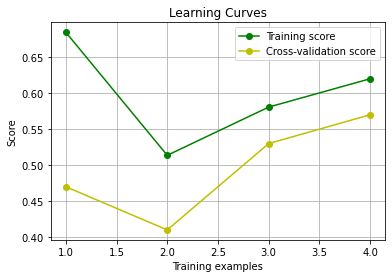

In [28]:
draw_learning_curves(X,Y,estimator,5) #Error due to Bias(Underfitting)

F:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py", line 423, in fit
    y = self._validate_y(y, sample_weight)
  File "F:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py", line 1107, in _validate_y
    raise ValueError("y contains %d class after sample_weight "
ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

  warnings.warn("Estimator fit failed. The score on this train-test"


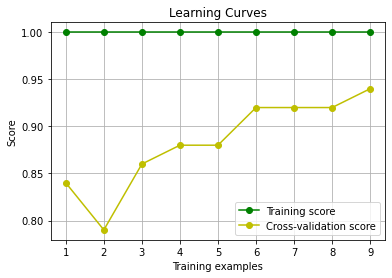

In [37]:
estimator1=GradientBoostingClassifier() 
draw_learning_curves(X,Y,estimator1,10) # Best fit Model


F:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\anaconda\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "F:\anaconda\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


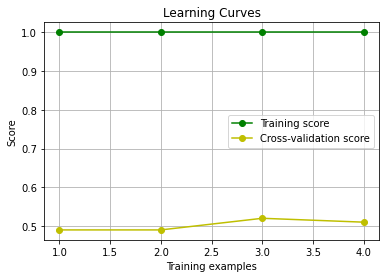

In [33]:
estimator2=SVC(kernel='rbf', gamma=1000) # Error due to Variance (Overfitting)
draw_learning_curves(X,Y,estimator2,5)
